# Chapter 22: Graphing and plotting

Music notation isn’t the only way to understand music visually

**Visualization** of notes, scores, and measures, these plots of a musical score can reveal relationships across a piece that hard to understand otherwise.

In [2]:
from music21 import *

In [22]:
%matplotlib inline

## Piano Rolls!

time is usually represented on the horizontal axis and pitch height along the vertical

Let’s load up some Verdi

In [4]:
verdi = corpus.parse('verdi/laDonnaEMobile')
verdi.id = 'verdi'
verdi.measures(1, 10).show('xml')

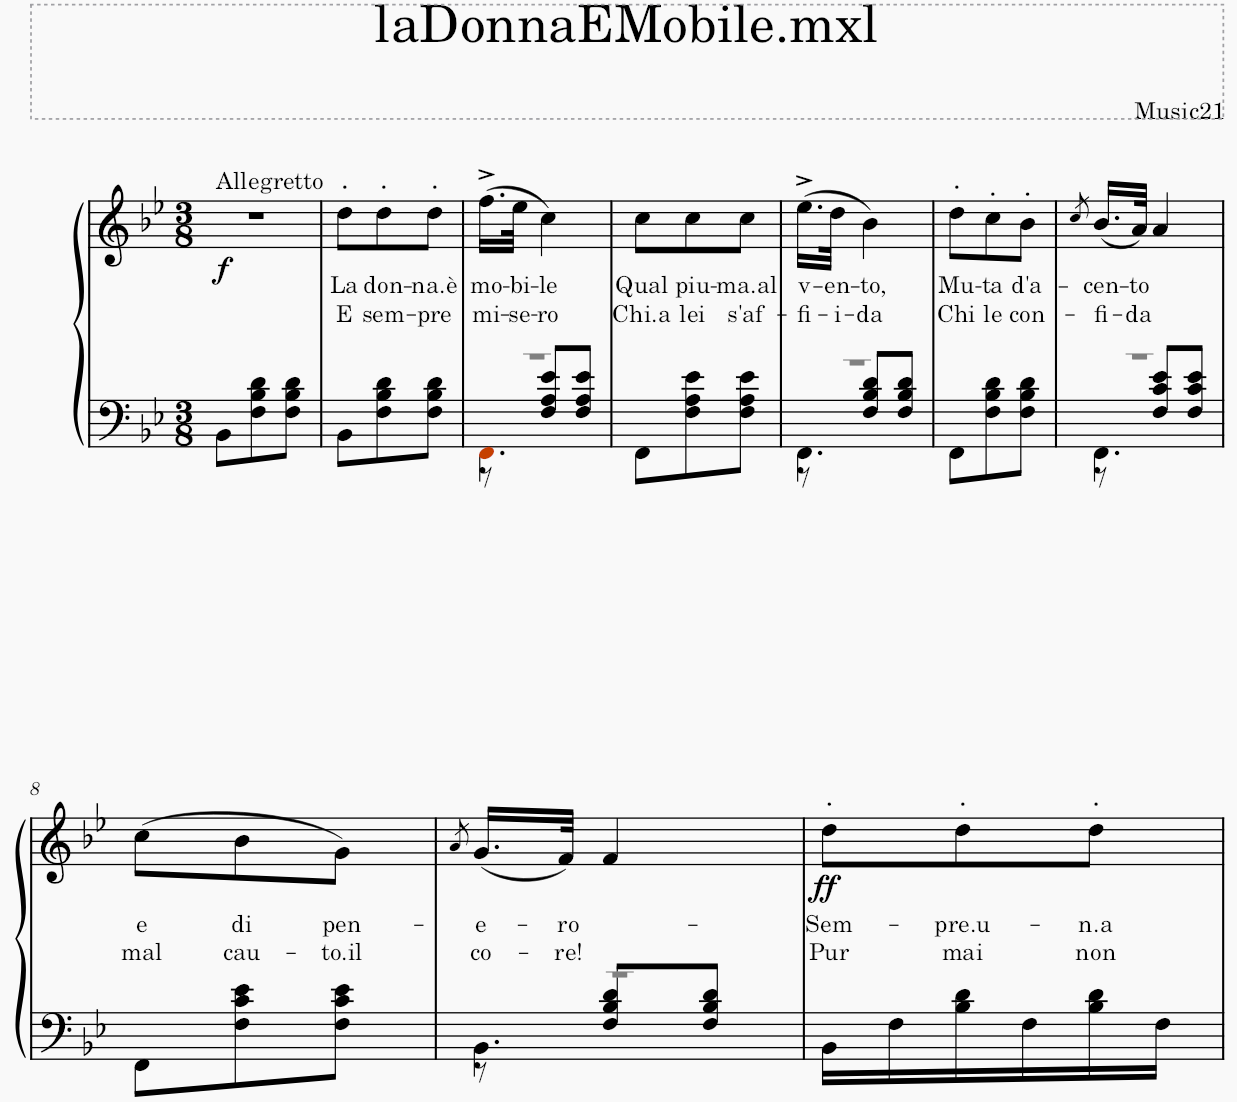

First, let’s visualize the vocal part alone

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.PartStaff P1-Staff1>>

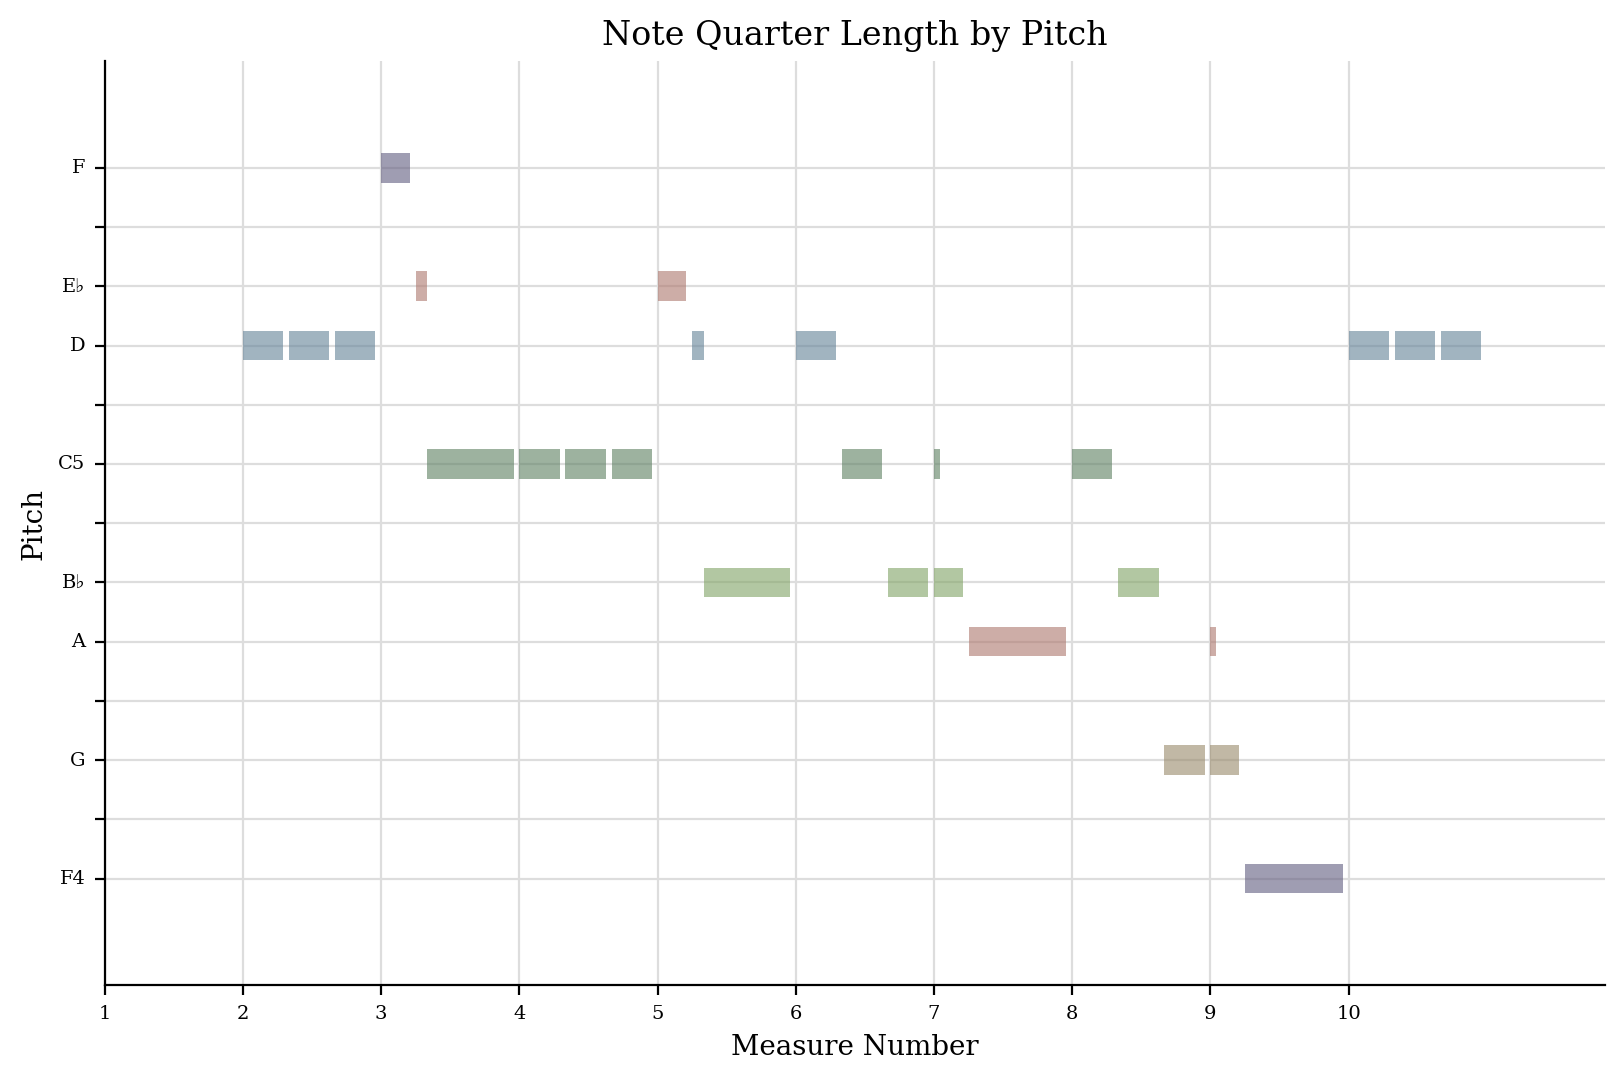

In [5]:
voice = verdi.parts[0]
voice.measures(1, 10).plot()

plotting lengths of notes against their position in space

In [8]:
schoenberg = corpus.parse('schoenberg/opus19', 2)
schoenberg.id = 'schoenberg'
schoenberg.measures(1, 4).show('xml')

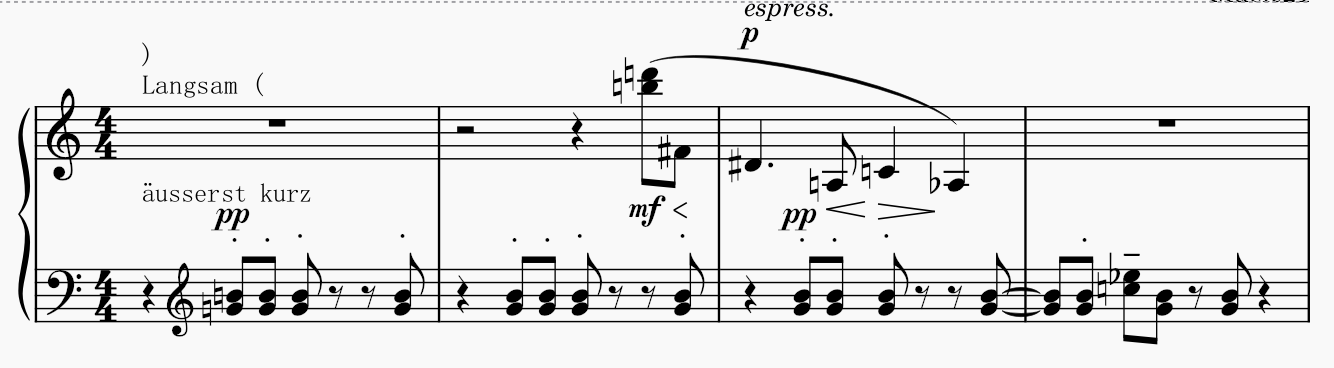

Let’s do a **scatter plot** of quarterLength against pitch

<music21.graph.plot.ScatterPitchSpaceQuarterLength for <music21.stream.Score schoenberg>>

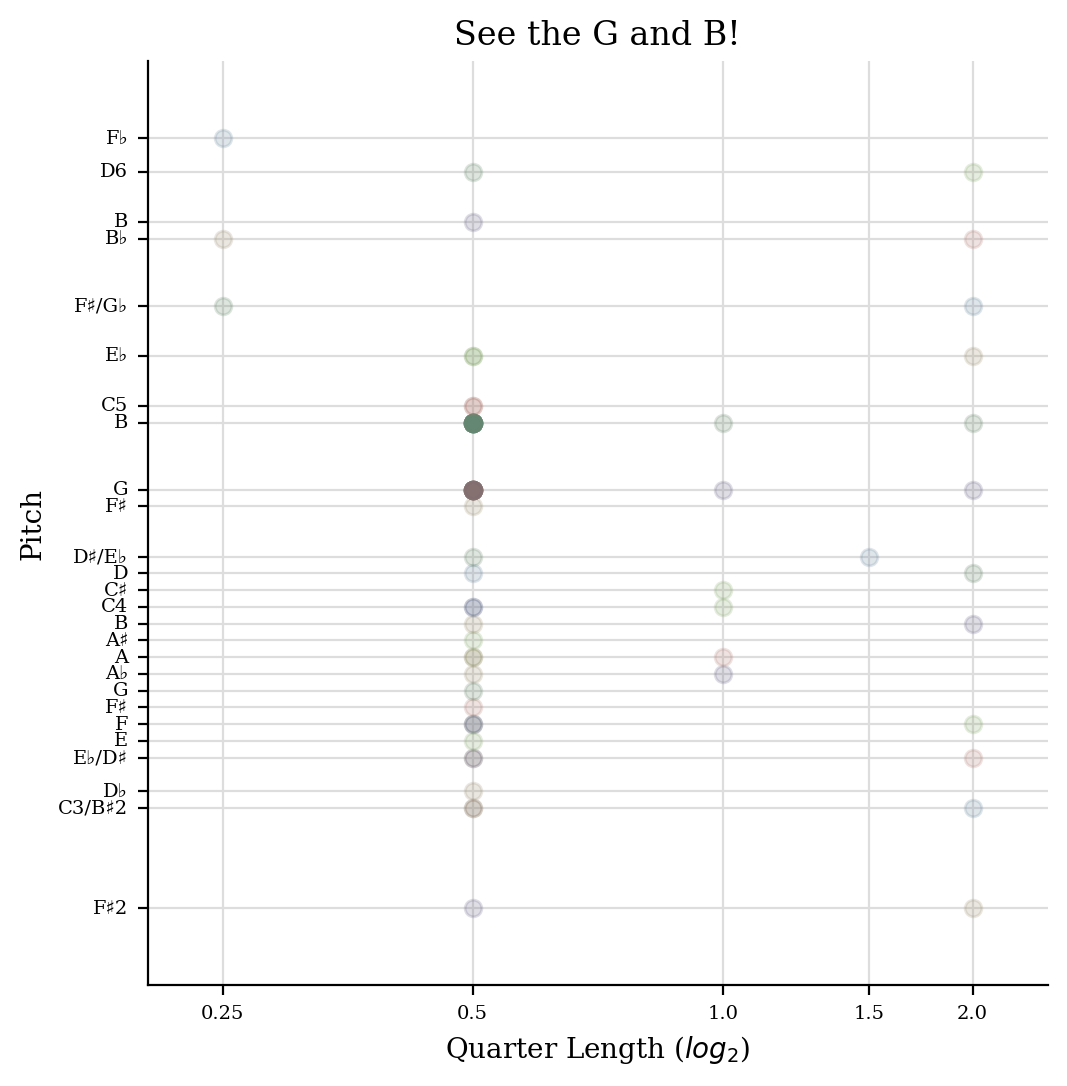

In [9]:
schoenberg.plot('scatter', 'quarterLength', 'pitch', title='See the G and B!')

a histogram of pitch

<music21.graph.plot.Histogram for <music21.stream.Score schoenberg>>

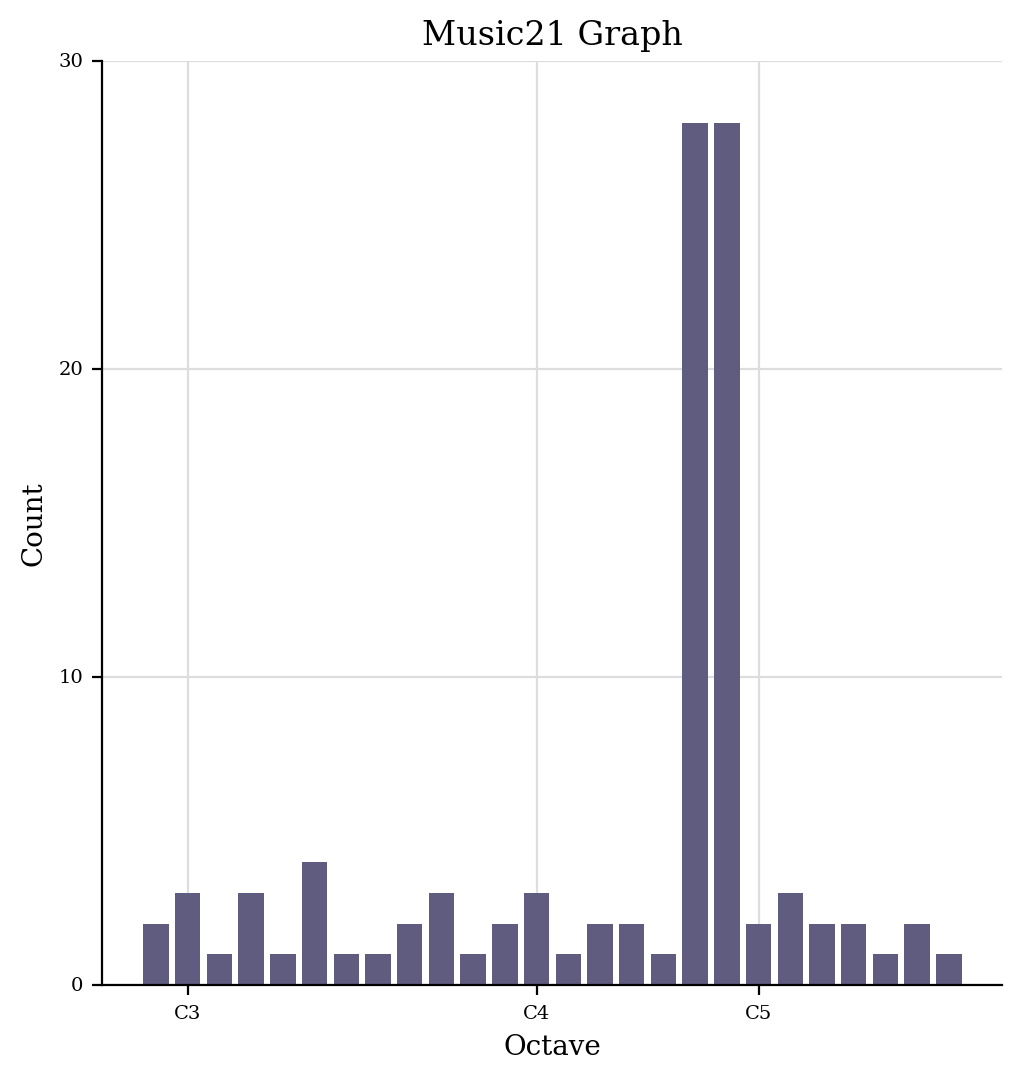

In [10]:
schoenberg.plot('histogram', 'octave')

<music21.graph.plot.Histogram for <music21.stream.Score schoenberg>>

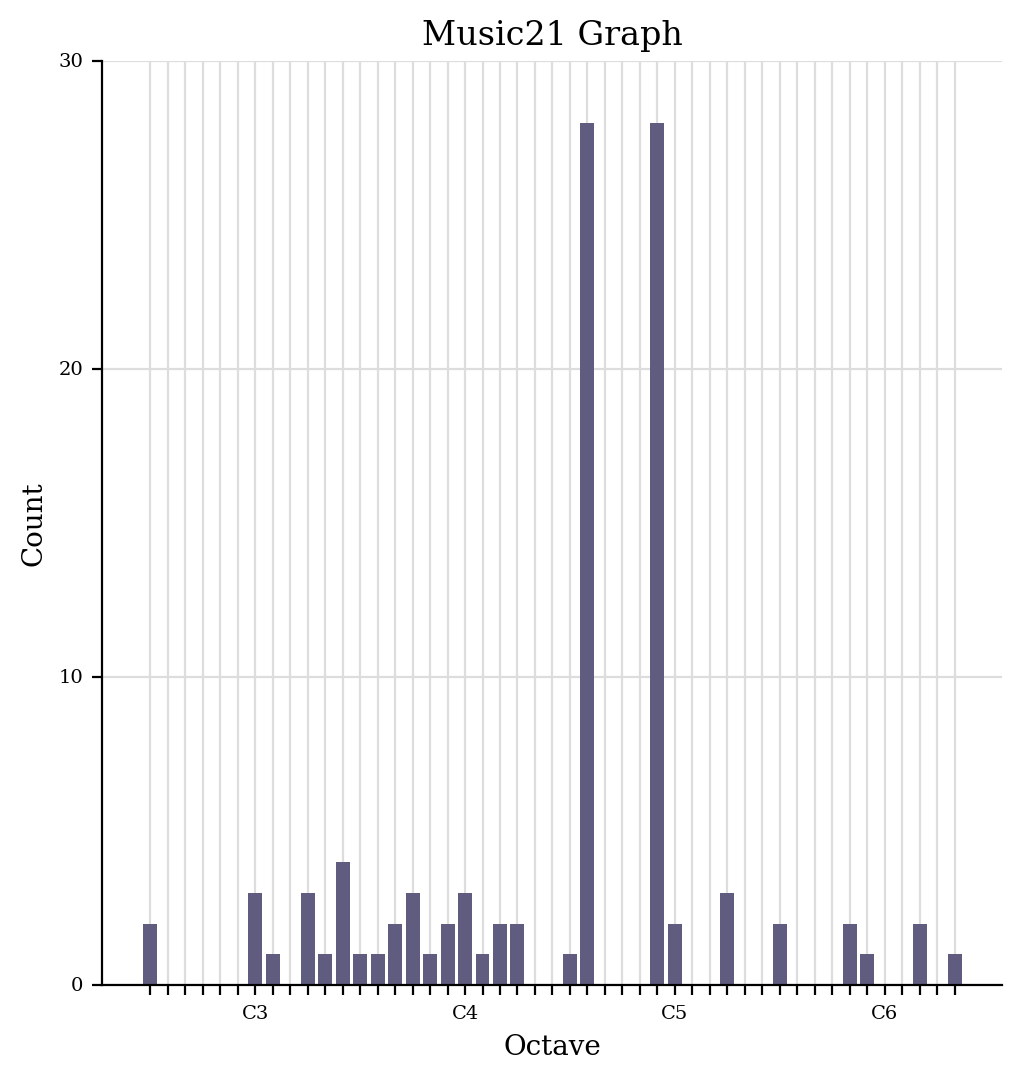

In [15]:
# not hide unused pithces' notes
schoenberg.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

Or even just pitch classes

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score schoenberg>>

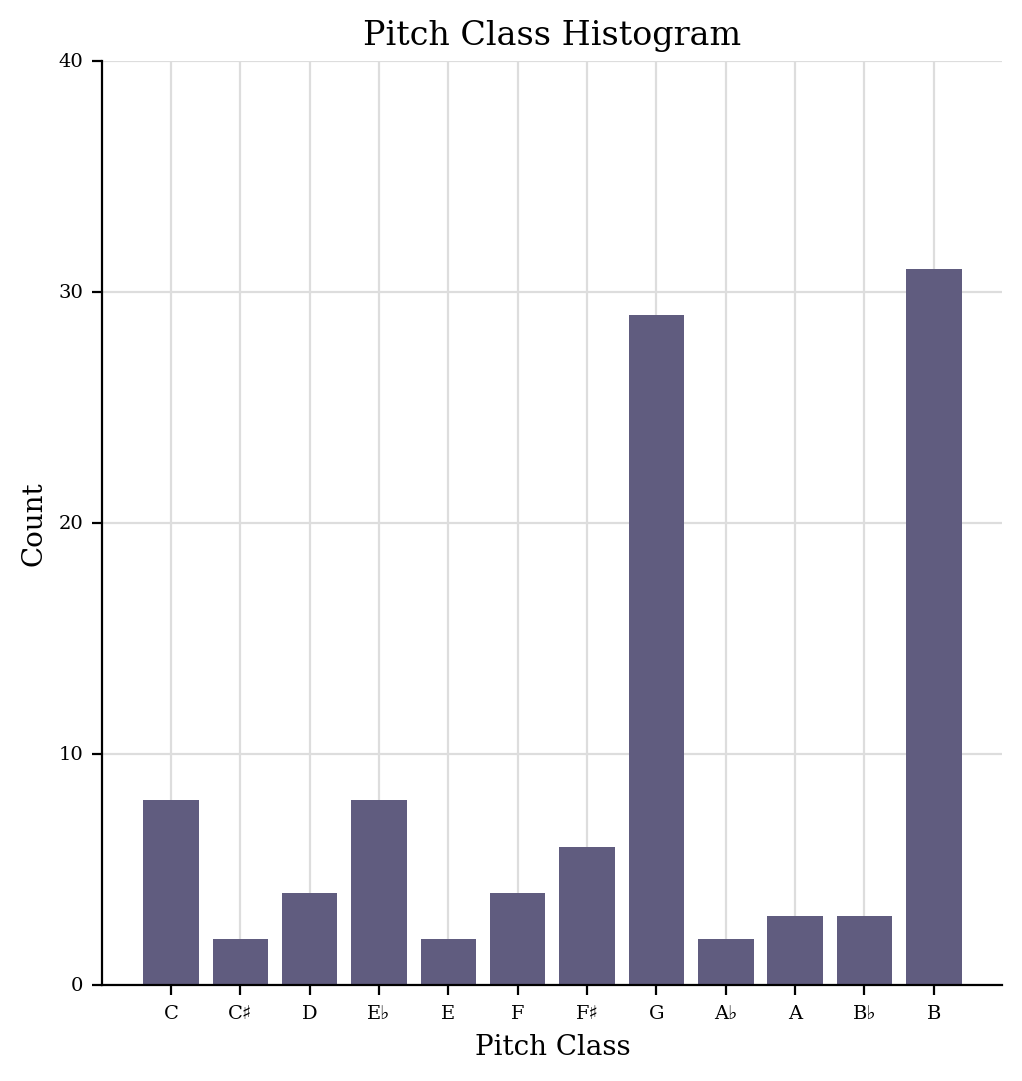

In [16]:
schoenberg.plot('histogram', 'pitchClass')

<music21.graph.plot.HistogramQuarterLength for <music21.stream.Score schoenberg>>

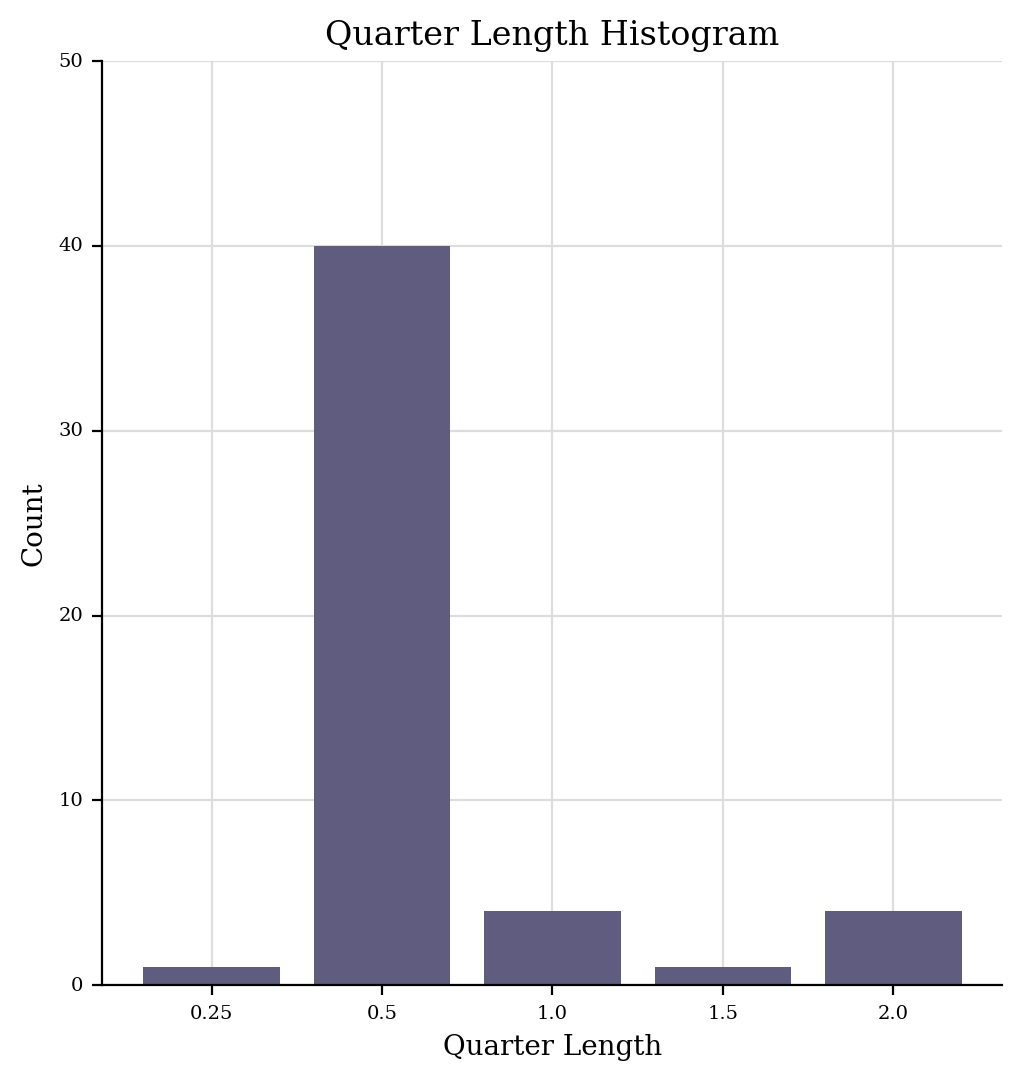

In [21]:
schoenberg.plot('histogram')

Graphing functions are loacted as below:
https://web.mit.edu/music21/doc/moduleReference/moduleGraph.html#modulegraph

## What sorts of graphs are there?

find the list of possible graphs

In [23]:
graph.findPlot.FORMATS

['horizontalbar',
 'histogram',
 'scatter',
 'scatterweighted',
 '3dbars',
 'colorgrid',
 'horizontalbarweighted']

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score verdi>>

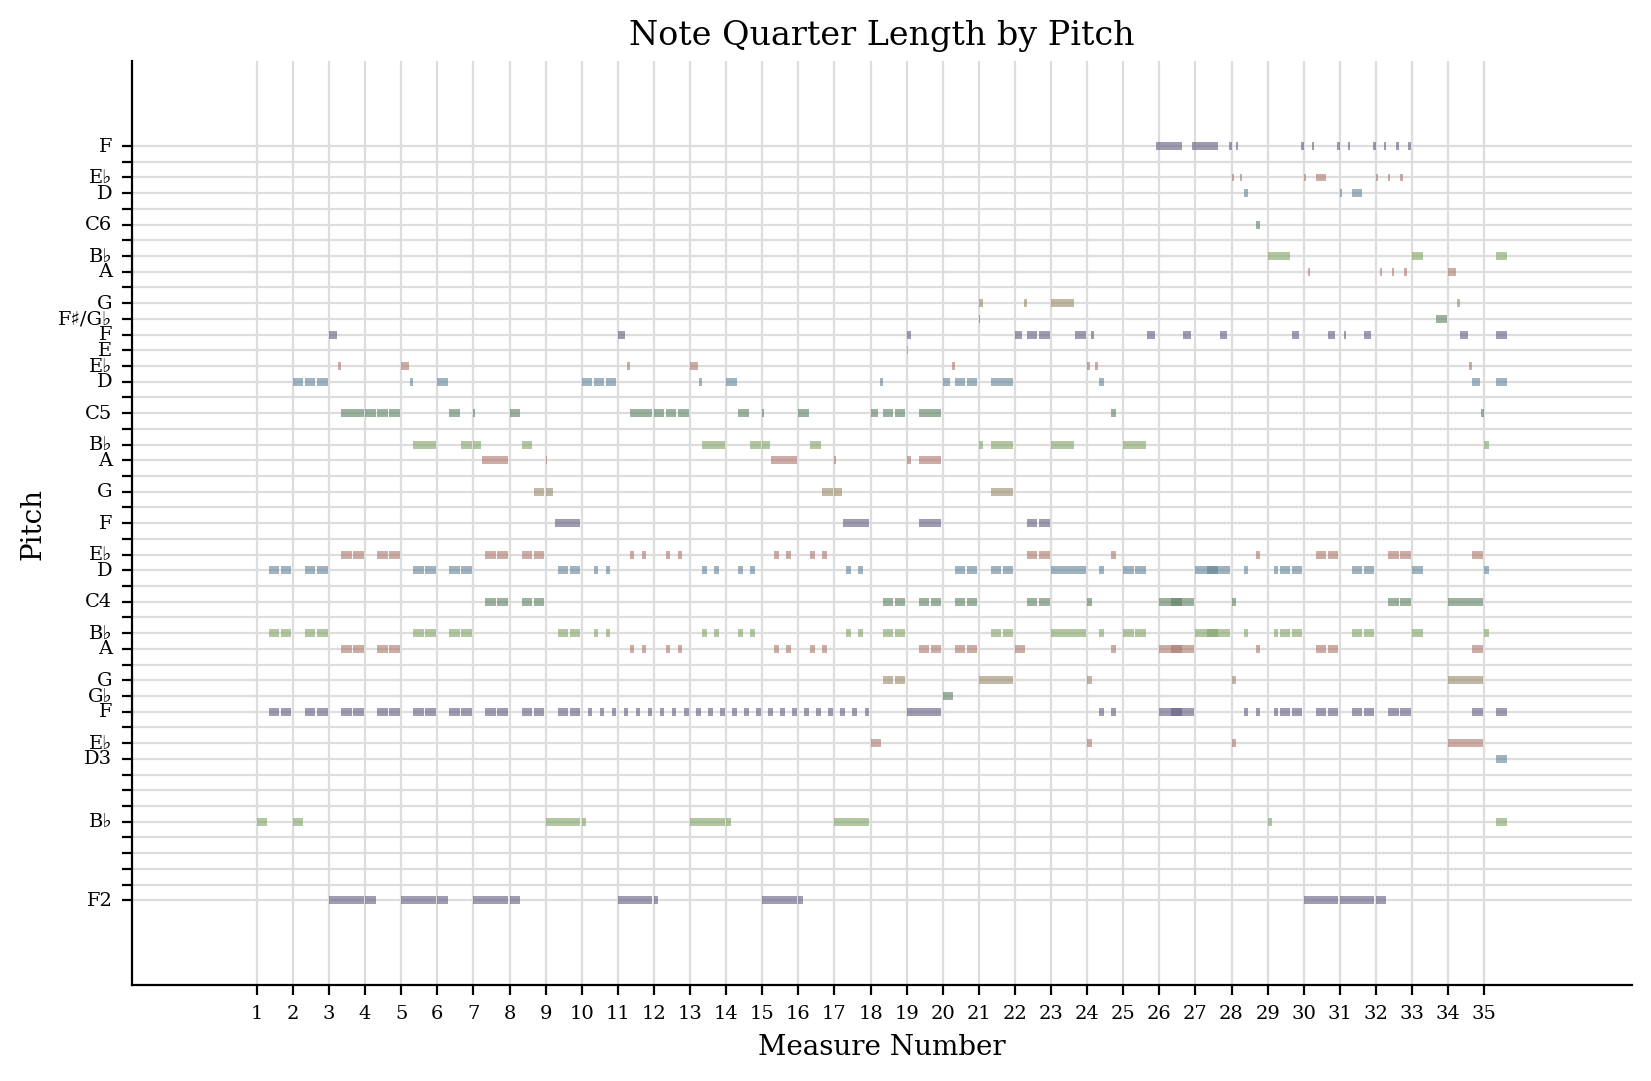

In [24]:
verdi.plot('horizontalbar')

<music21.graph.plot.HistogramPitchSpace for <music21.stream.Score verdi>>

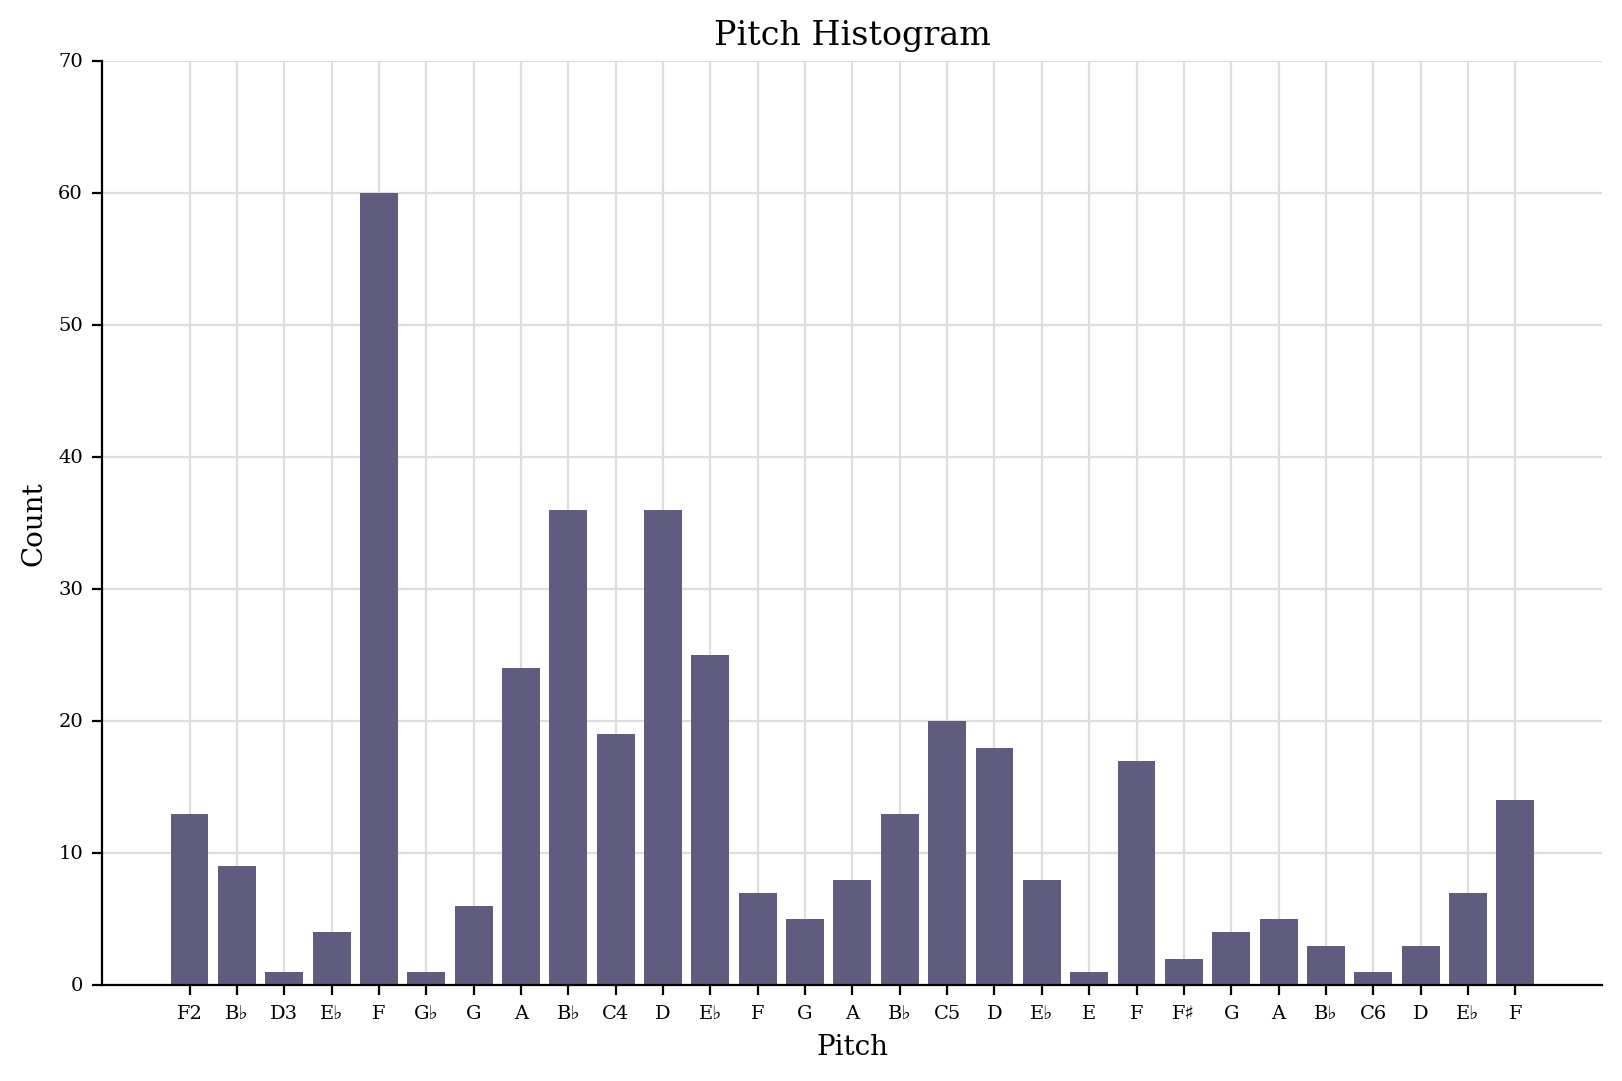

In [25]:
verdi.plot('histogram', 'pitch')

plotted quarter length against pitch

<music21.graph.plot.ScatterPitchSpaceQuarterLength for <music21.stream.Score schoenberg>>

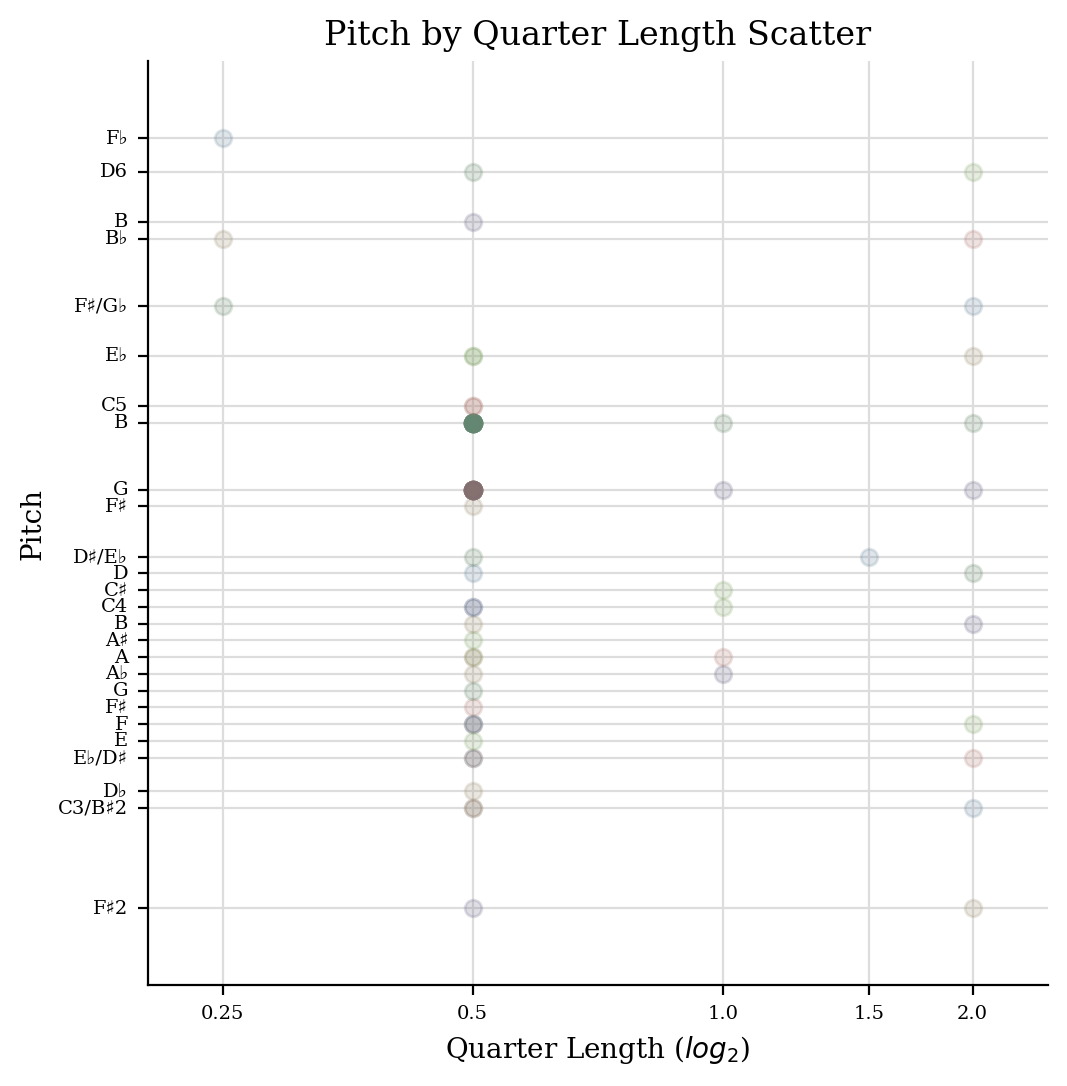

In [26]:
schoenberg.plot('scatter', 'pitch', 'quarterLength')

plotted pitch against dynamics

<music21.graph.plot.ScatterWeightedPitchSpaceQuarterLength for <music21.stream.Score verdi>>

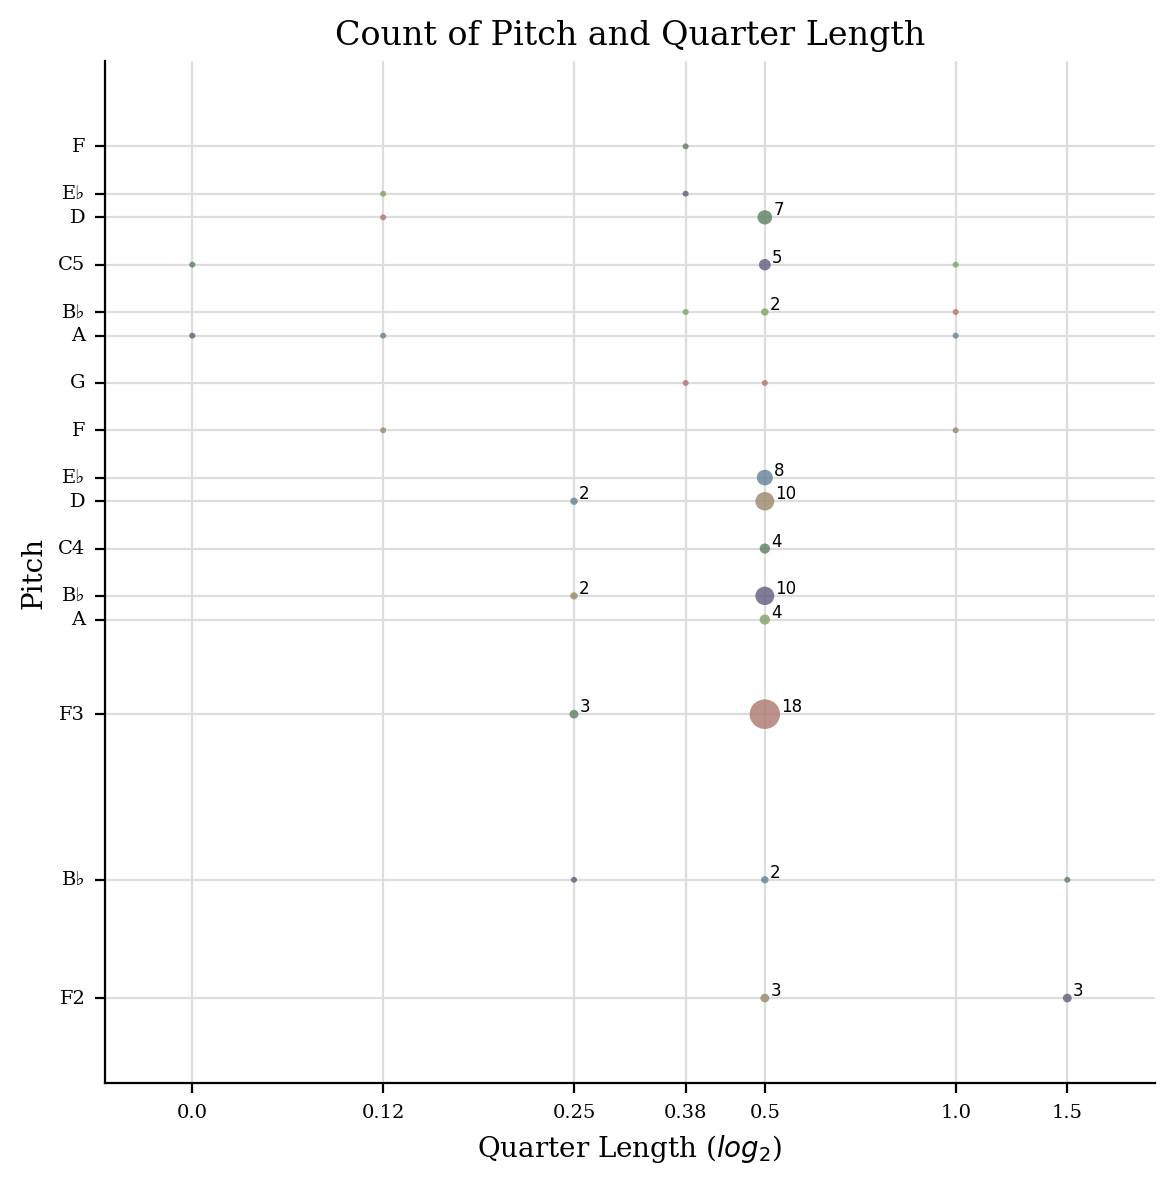

In [27]:
verdi.measures(1, 10).plot('scatterweighted', 'pitch', 'quarterLength')

<music21.graph.plot.WindowedKey for <music21.stream.Score verdi>>

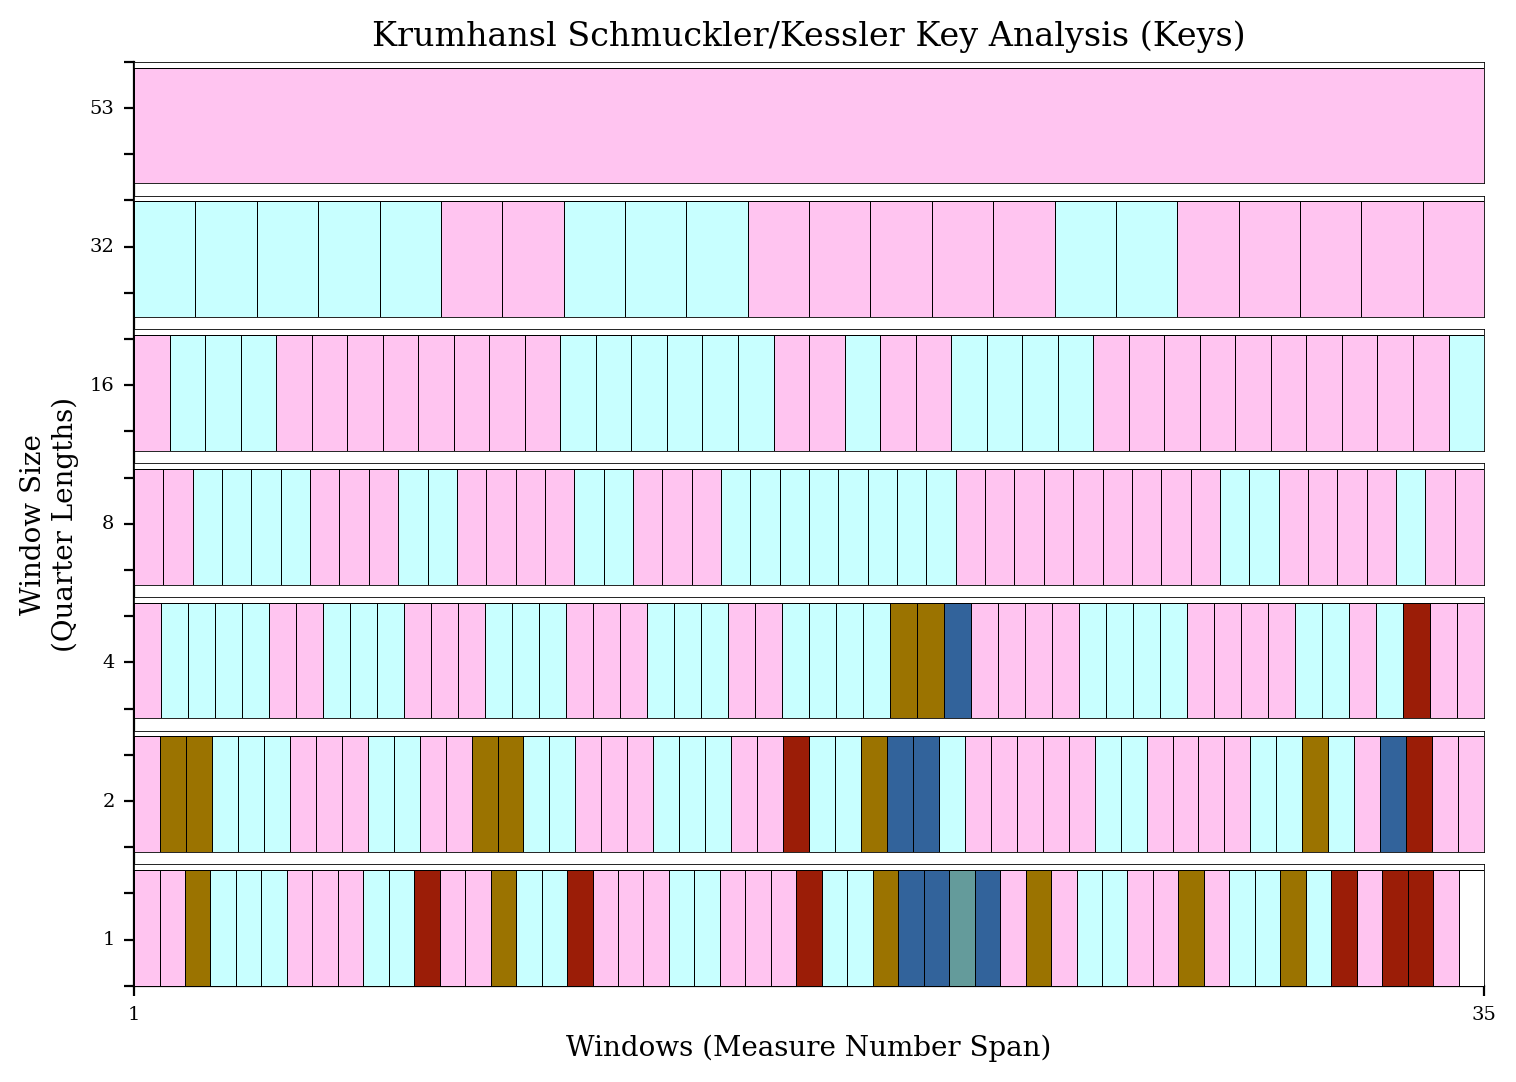

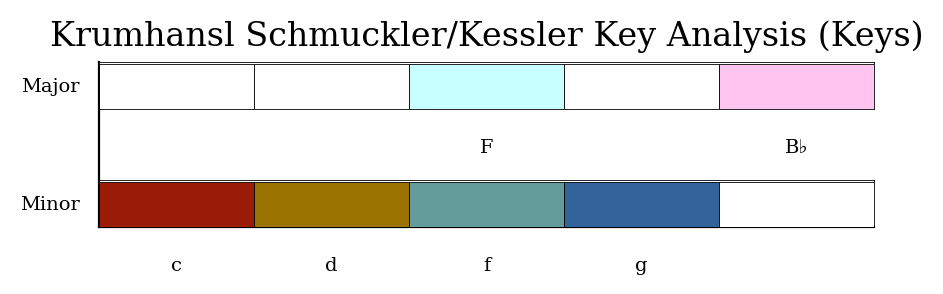

In [28]:
verdi.plot('colorgrid')

Here we can see each part plotted when it plays and with dynamics(强弱法)

<music21.graph.plot.HorizontalBarWeighted for <music21.stream.Score schoenberg>>

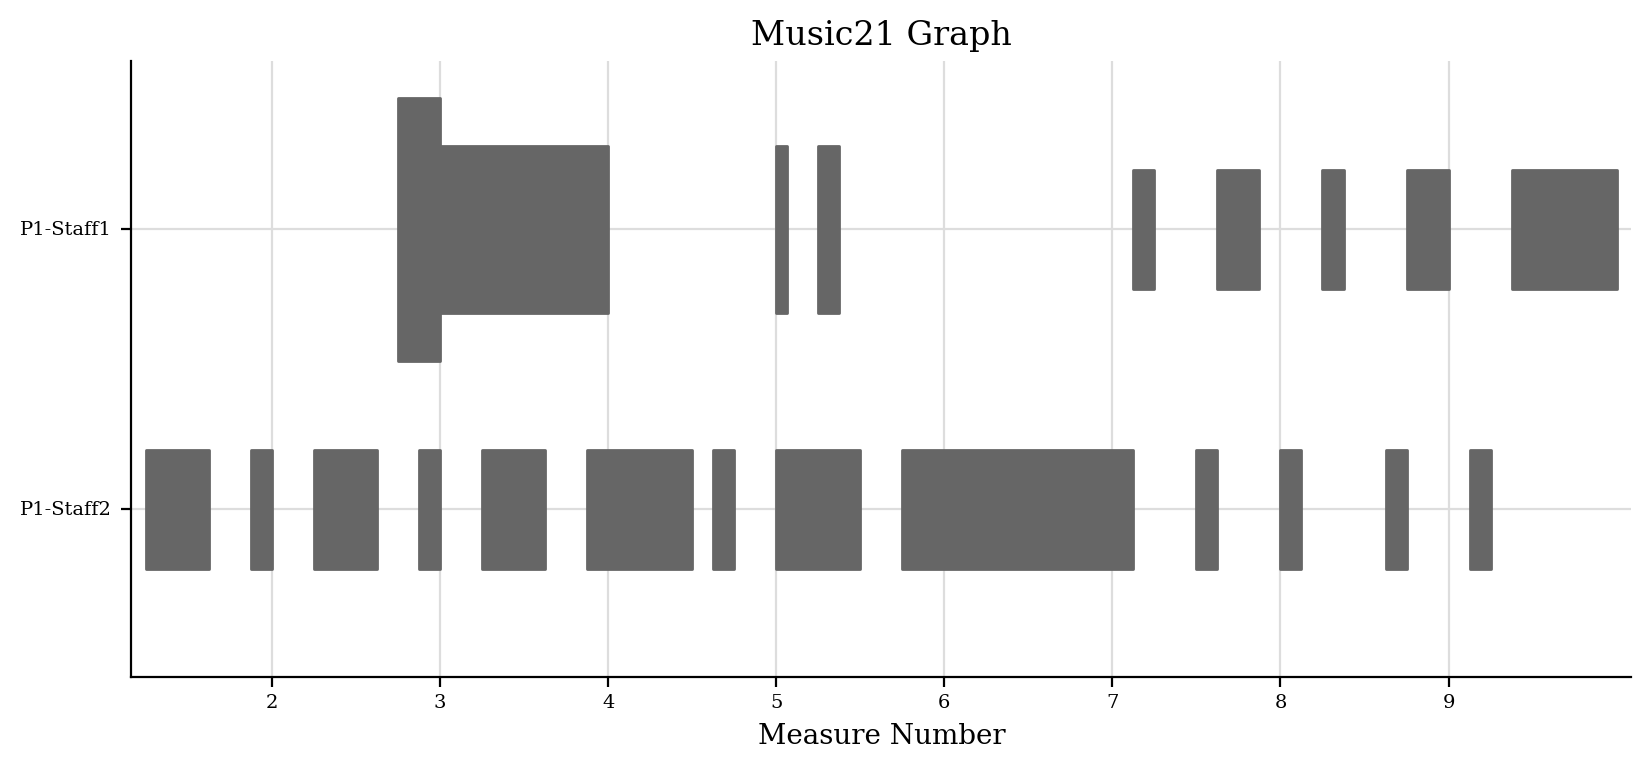

In [29]:
schoenberg.plot('horizontalbarweighted')

and we’ve saved the silliest for last

<music21.graph.plot.Plot3DBarsPitchSpaceQuarterLength for <music21.stream.Score verdi>>

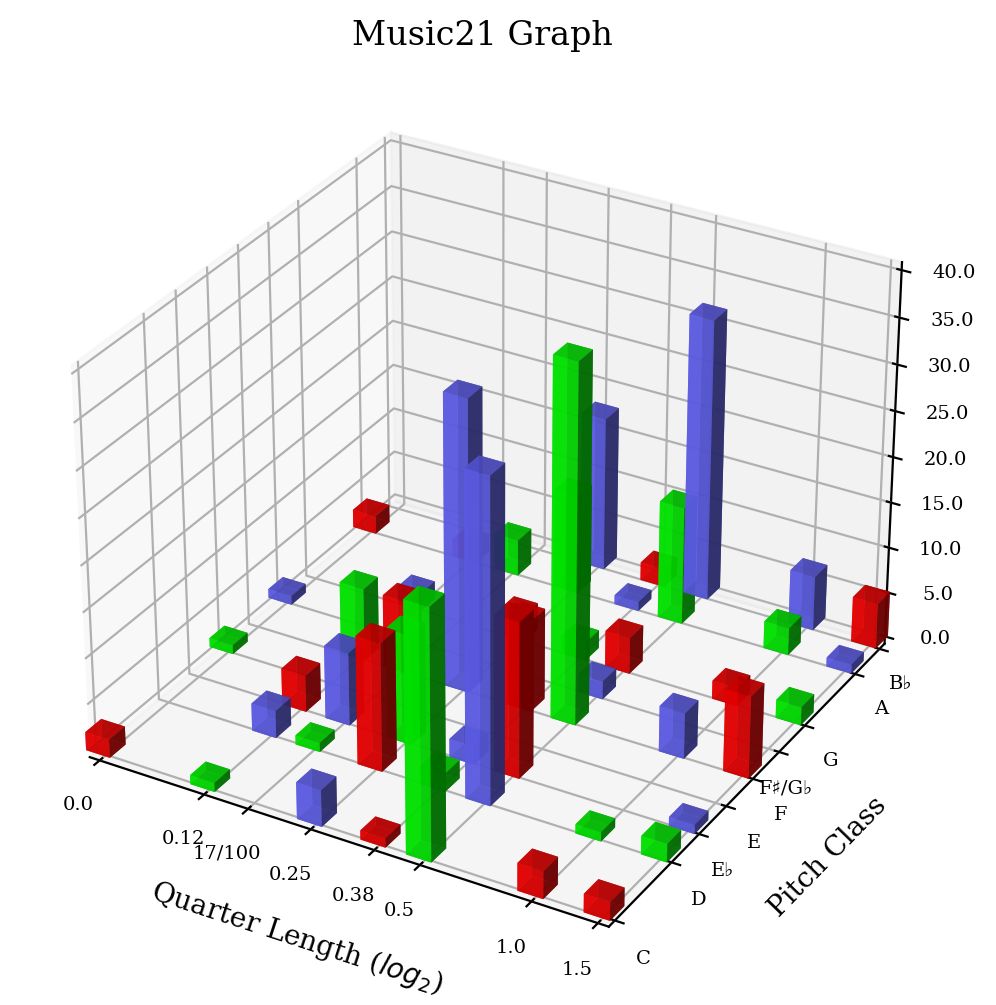

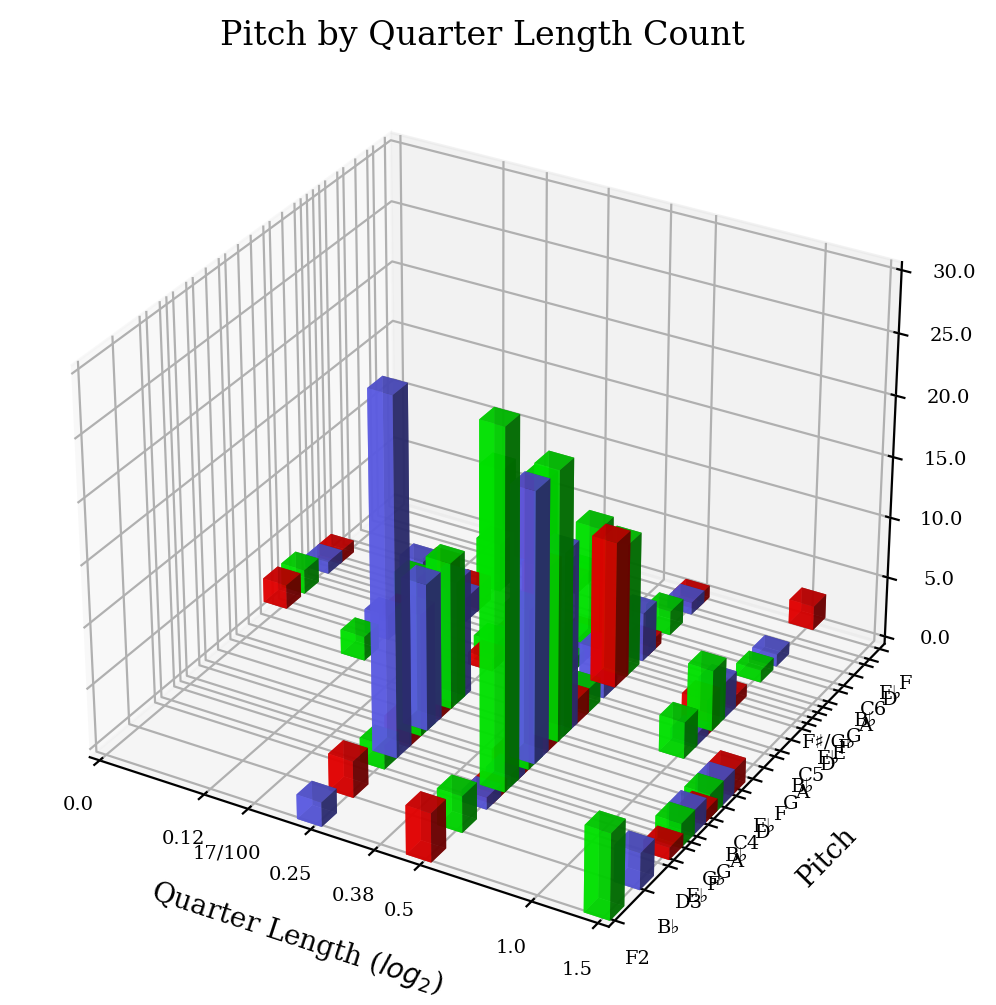

In [30]:
verdi.plot('3dbars')
# The 3D aspect looks pretty cool, but it's difficult to learn from it

Each of these plots also has a bunch of synonyms(同义词)

In [31]:
graph.findPlot.FORMAT_SYNONYMS

[('horizontalbar', 'bar', 'horizontal', 'pianoroll', 'piano'),
 ('histogram', 'histo', 'count'),
 ('scatter', 'point'),
 ('scatterweighted', 'weightedscatter', 'weighted'),
 ('3dbars', '3d'),
 ('colorgrid', 'grid', 'window', 'windowed'),
 ('horizontalbarweighted', 'barweighted', 'weightedbar')]

For completeness, there are a couple of **shortcuts** you can use also

In [32]:
graph.findPlot.PLOTCLASS_SHORTCUTS

{'ambitus': music21.graph.plot.WindowedAmbitus,
 'dolan': music21.graph.plot.Dolan,
 'instruments': music21.graph.plot.Dolan,
 'key': music21.graph.plot.WindowedKey,
 'pianoroll': music21.graph.plot.HorizontalBarPitchSpaceOffset}

The next arguments determine what sorts of things you can put on the axes

<music21.graph.plot.ScatterPitchClassQuarterLength for <music21.stream.Score verdi>>

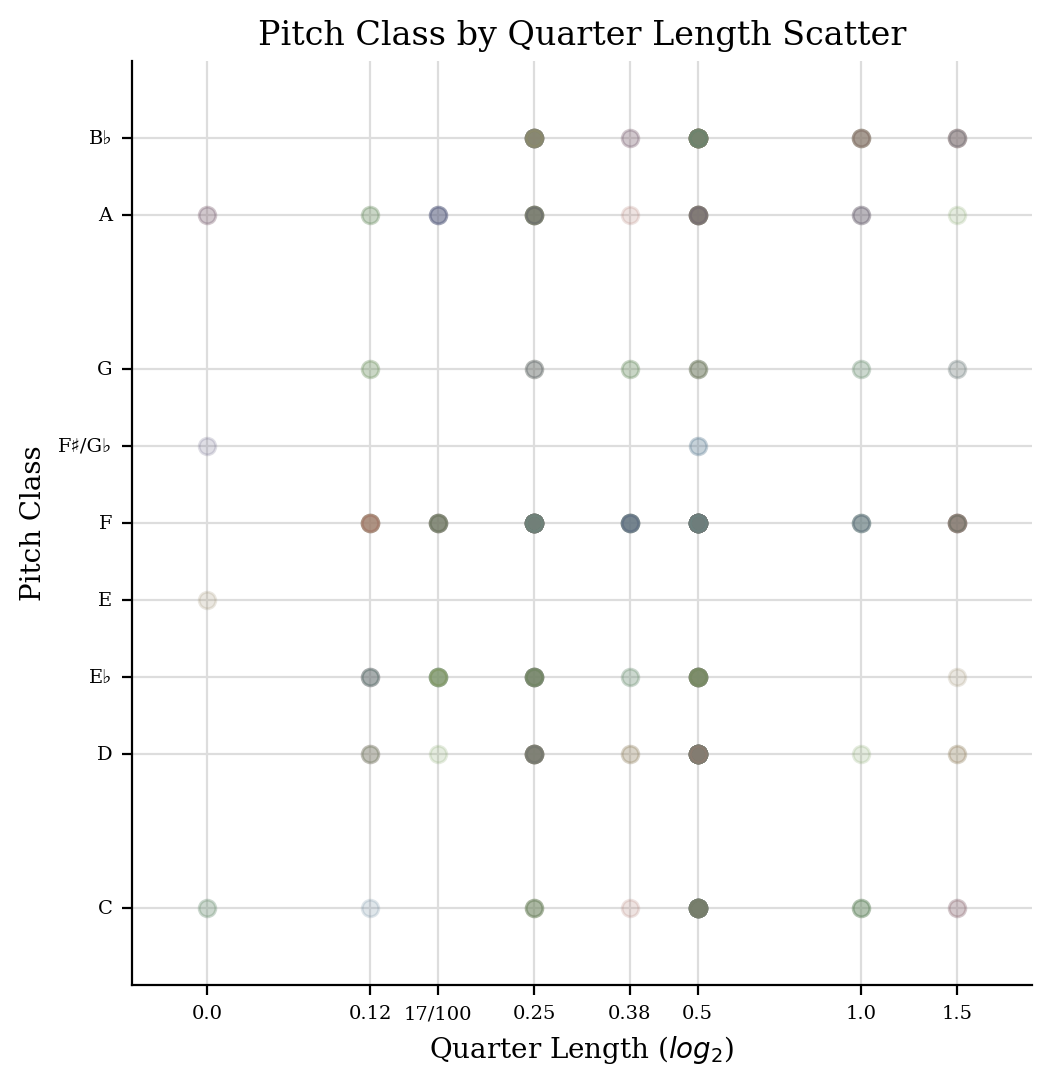

In [33]:
verdi.plot('scatter', 'pitchClass', 'quarterLength')

<music21.graph.plot.ScatterPitchSpaceDynamicSymbol for <music21.stream.Score verdi>>

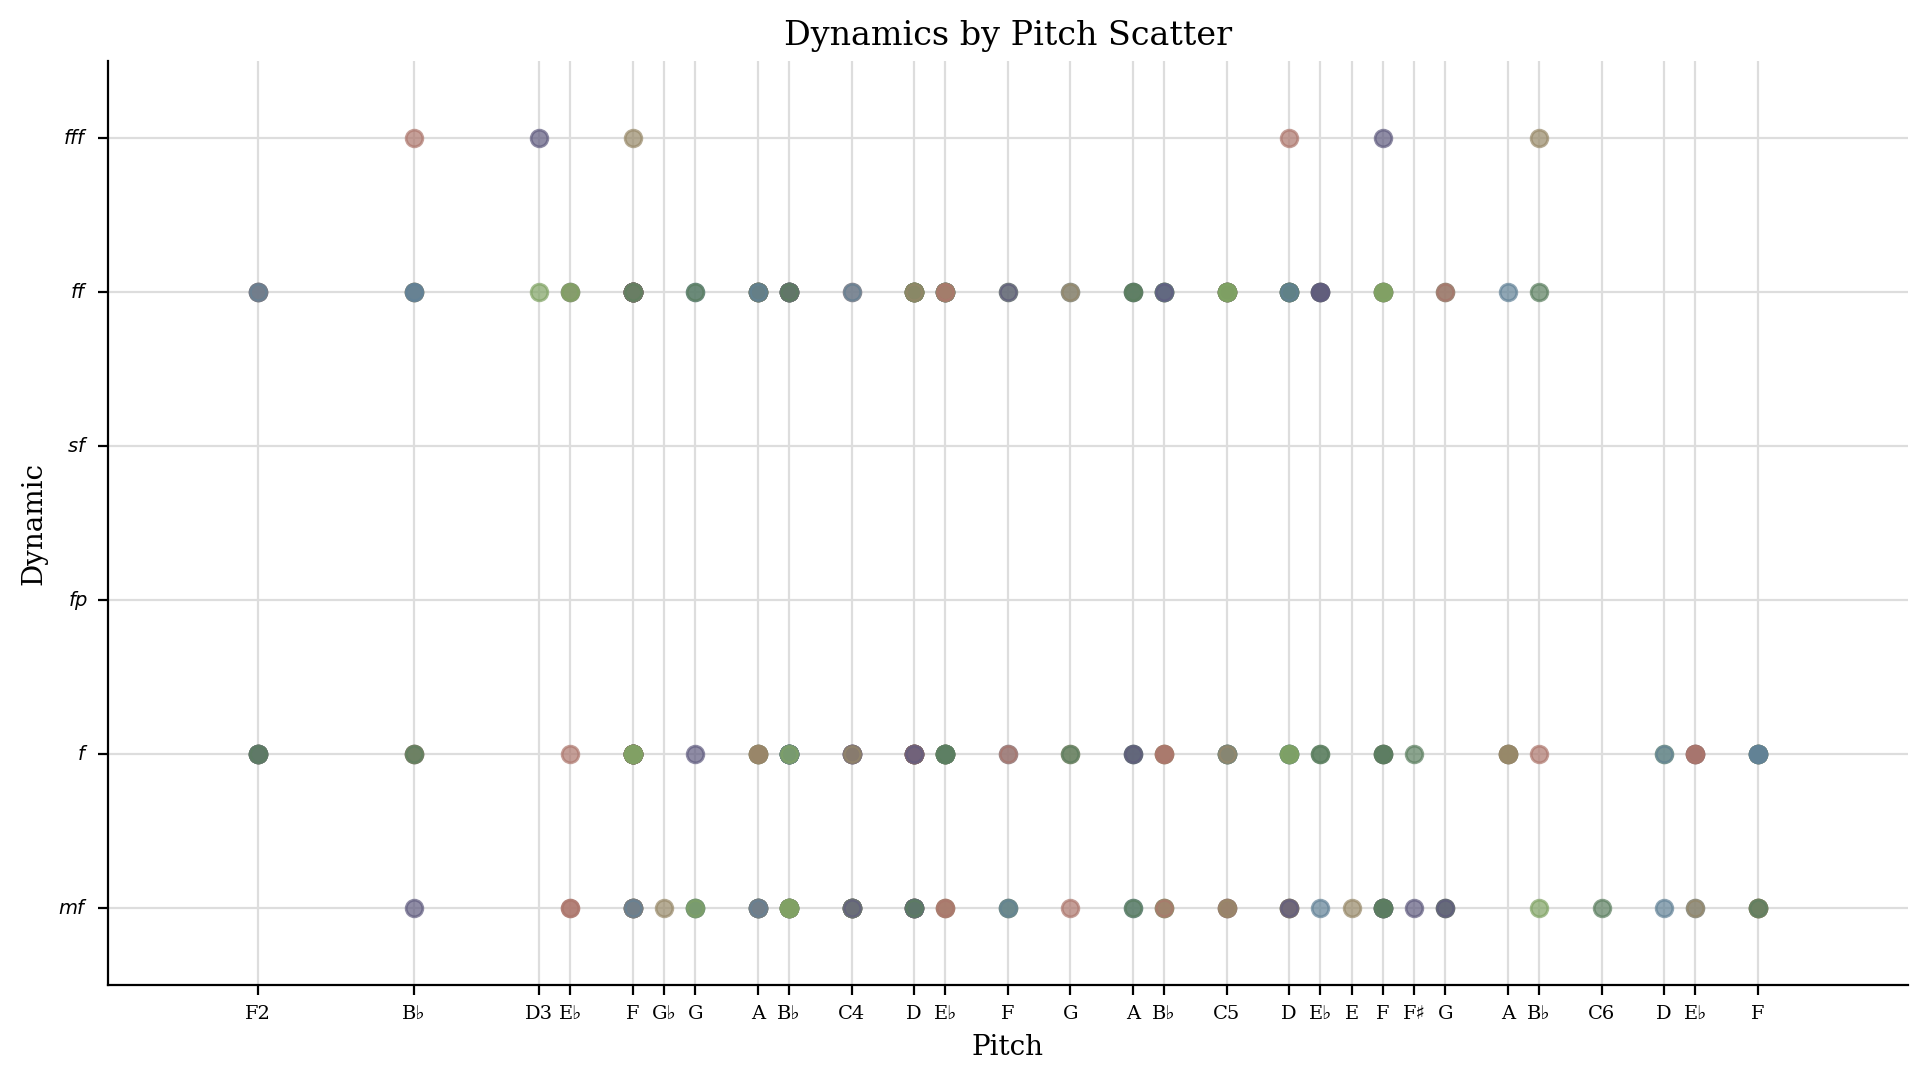

In [34]:
verdi.plot('scatter', 'dynamics')

We can see all the different things that we can put as an axis via

In [39]:
graph.findPlot.getAxisQuantities()

['generic',
 'count',
 'dynamic',
 'offset',
 'offsetEnd',
 'pitchGeneric',
 'pitchClass',
 'pitchSpace',
 'octave',
 'position',
 'quarterLength']

Some of these have synonyms that you can use instead

In [40]:
graph.findPlot.getAxisQuantities(synonyms=True)

['generic',
 'one',
 'nothing',
 'blank',
 'count',
 'quantity',
 'frequency',
 'counting',
 'dynamic',
 'dynamics',
 'volume',
 'offset',
 'measure',
 'offsets',
 'measures',
 'time',
 'offsetEnd',
 'timespans',
 'timespan',
 'pitchGeneric',
 'pitchClass',
 'pitchclass',
 'pc',
 'pitchSpace',
 'pitch',
 'pitchspace',
 'ps',
 'octave',
 'octaves',
 'position',
 'positions',
 'quarterLength',
 'ql',
 'quarterlengths',
 'durations',
 'duration']

## Application – pitchSpace counting

Both Robert Schumann and Frederic Chopin were composers living in the 19th century, Their music sounds similar but strikingly different.

Does their distribution of pitches have something to do with it?

<music21.graph.plot.HistogramPitchSpace for <music21.stream.Score 0x2184d36b5e0>>

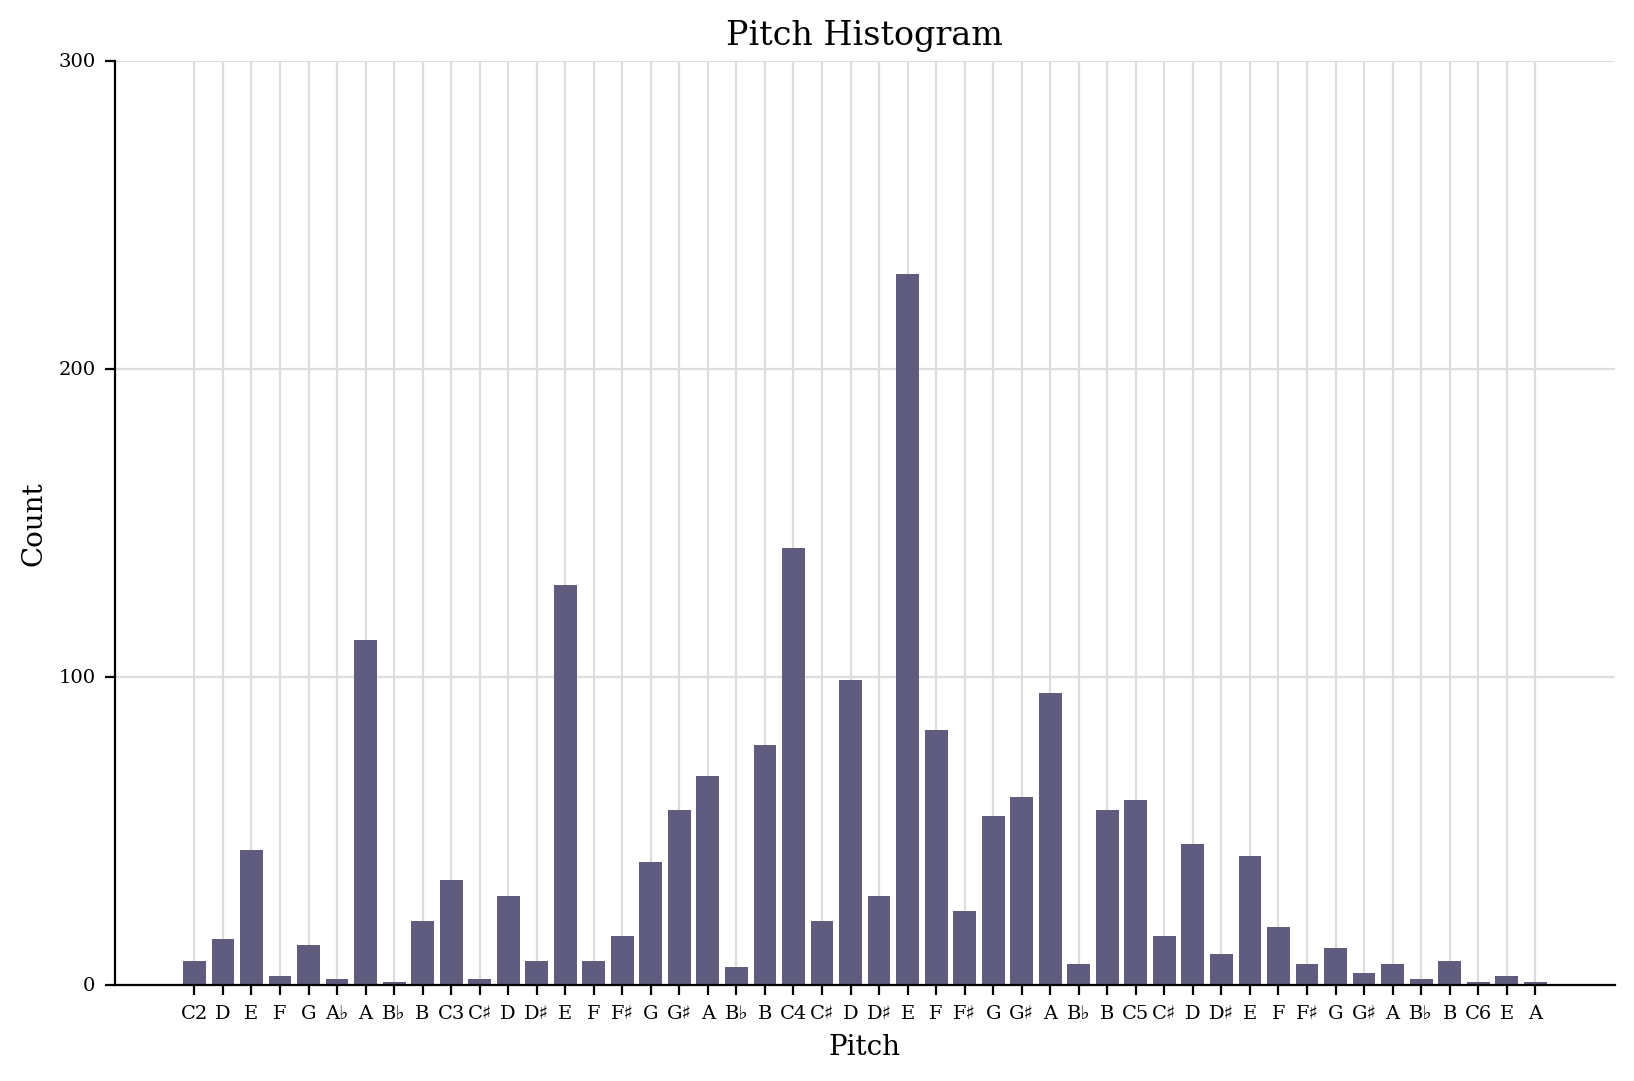

In [41]:
# Let’s compare
schumann = corpus.parse('schumann/opus41no1', 3)
schumann.plot('histogram', 'pitch')

Schumann’s piece has a sort of **bell-curve shaped distribution**(Normal distribution 正态分布).

 some notes stand out, **A2, E3, and E4**–it is in a-minor

In [42]:
schumann.analyze('key')

<music21.key.Key of a minor>

but for the most part, it’s pretty nicely shaped. Compare it to the work by Chopin

<music21.graph.plot.HistogramPitchSpace for <music21.stream.Score 0x2184e5eae20>>

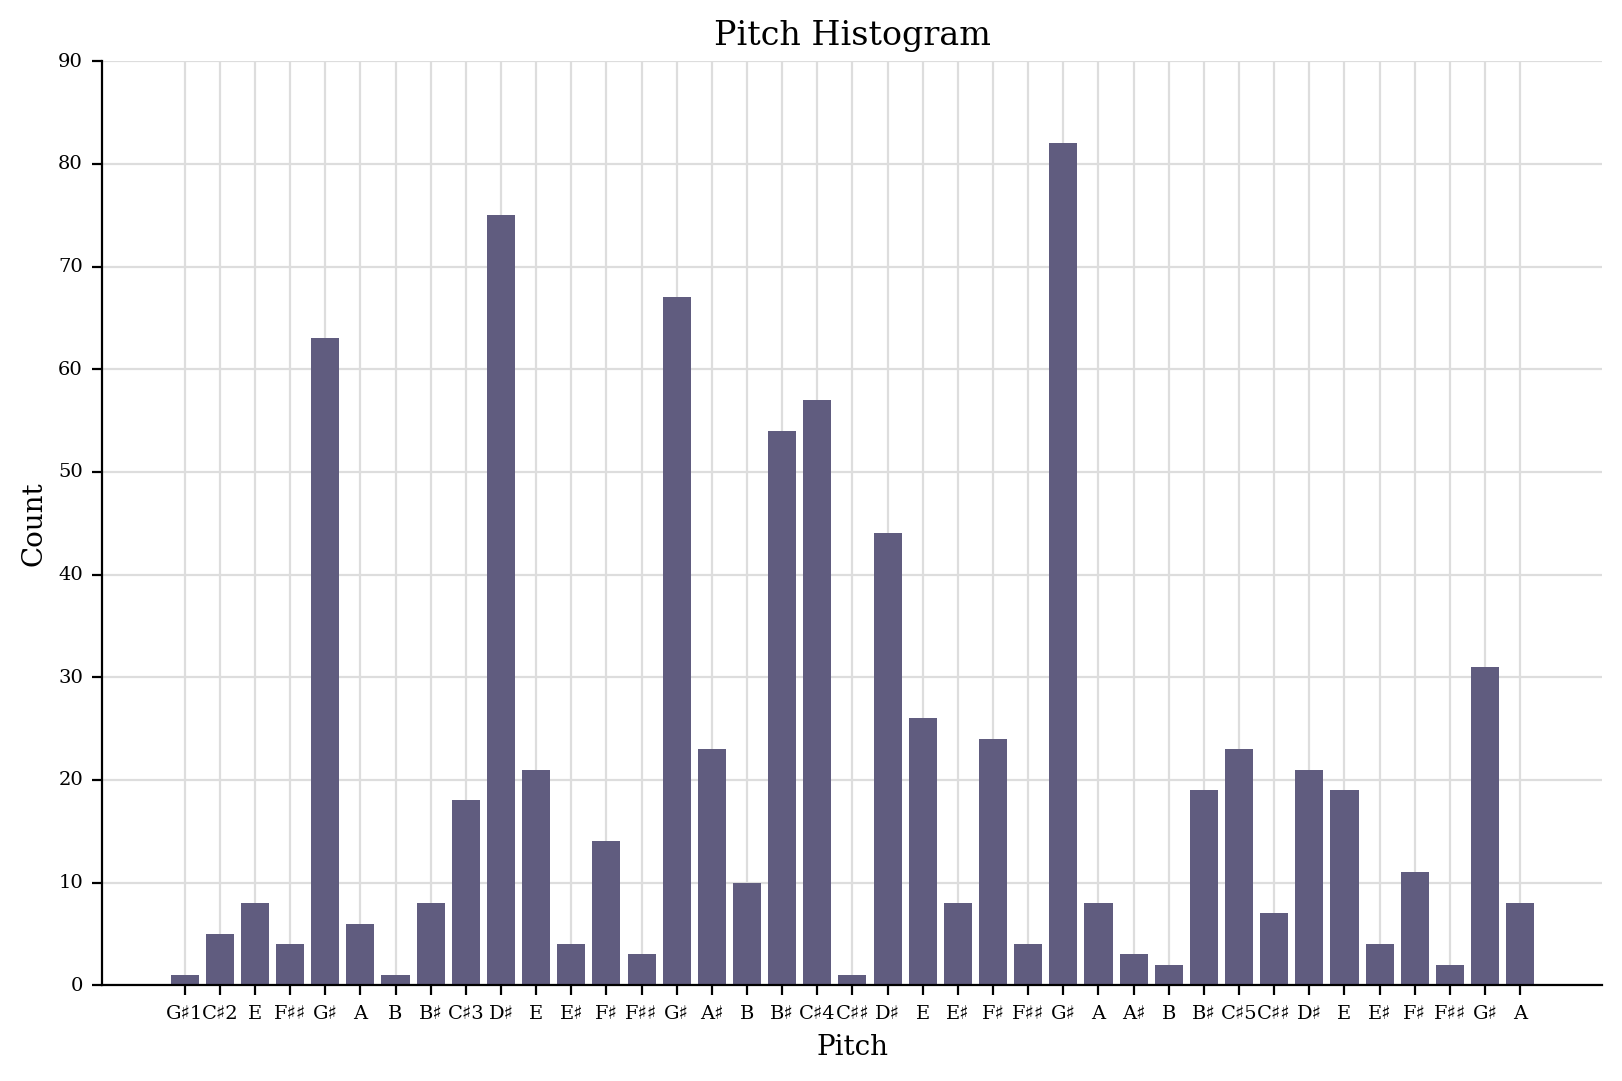

In [43]:
chopin = corpus.parse('chopin/mazurka')
chopin.plot('histogram', 'pitch')

Chopin’s piece has jagged points everywhere like a poorly planned city with a few notes, especially **G#4** sticking out